In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'/Users/gowthammarrapu/Documents/untitled folder 2/zomato_rawdata.sqlite')

In [4]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
df.head(4)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [6]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'].replace(('NEW','-'), np.nan, inplace=True)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
'4.1/5'

'4.1/5'

In [12]:
'4.1/5'.split('/')[0]

'4.1'

In [13]:
float('4.1/5'.split('/')[0])

4.1

In [14]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [15]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [16]:
df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [17]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
x = df[['rate','online_order']]


In [19]:
x


,rate,online_order
0,4.1,Yes
1,4.1,Yes
2,3.8,Yes
3,3.7,No
4,3.8,No
...,...,...
51712,3.6,No
51713,NaN,No
51714,NaN,No
51715,4.3,No


In [20]:
x = pd.crosstab(df['rate'],df['online_order'])

In [21]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:xlabel='rate'>

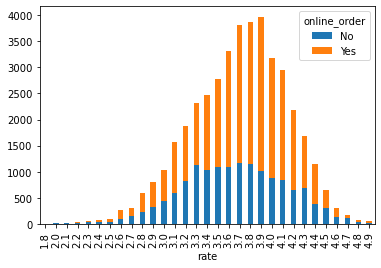

In [22]:
 x.plot(kind='bar', stacked=True)

In [23]:
x.sum(axis =1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [24]:
normalise_df = x.div(x.sum(axis =1).astype(float),axis=0)

<AxesSubplot:xlabel='rate'>

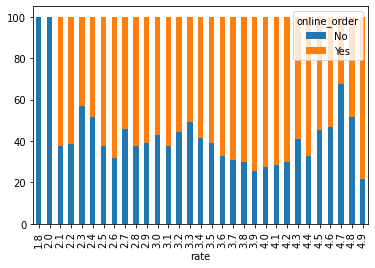

In [25]:
(normalise_df*100).plot(kind='bar', stacked=True)

In [26]:
df['rest_type'].isnull().sum()

227

In [27]:
data = df.dropna(subset=['rest_type'])

In [28]:
data['rest_type'].isnull().sum()

0

In [29]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [30]:
quick_Bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [31]:
quick_Bites_df.shape

(20639, 18)

In [32]:
quick_Bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [33]:
quick_Bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [34]:
quick_Bites_df['reviews_list']=quick_Bites_df['reviews_list'].apply(lambda x:x.lower())

/var/folders/nf/79h8ktw91rj20g2ctf7g3t640000gn/T/ipykernel_411/2754502288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_Bites_df['reviews_list']=quick_Bites_df['reviews_list'].apply(lambda x:x.lower())


In [35]:
from nltk import RegexpTokenizer 

In [36]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [37]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [38]:
tokenizer.tokenize(quick_Bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [39]:
sample = data[0:1000]

In [40]:
reviews_token = sample['reviews_list'].apply(tokenizer.tokenize)

In [41]:
reviews_token

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

In [42]:
from nltk.corpus import stopwords

In [43]:
stop = stopwords.words('english')

In [44]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
stop.extend(['rated','n','nan','x','RATED','Rated'])

In [46]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
rev3 = reviews_token[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [48]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [49]:
reviews_token_clean=reviews_token.apply(lambda each_review: [token for token in rev3 if token not in stop])

In [50]:


print(reviews_token_clean)

0       [Great, food, proper, Karnataka, style, full, ...
1       [Great, food, proper, Karnataka, style, full, ...
2       [Great, food, proper, Karnataka, style, full, ...
3       [Great, food, proper, Karnataka, style, full, ...
4       [Great, food, proper, Karnataka, style, full, ...
                              ...                        
995     [Great, food, proper, Karnataka, style, full, ...
996     [Great, food, proper, Karnataka, style, full, ...
997     [Great, food, proper, Karnataka, style, full, ...
998     [Great, food, proper, Karnataka, style, full, ...
1000    [Great, food, proper, Karnataka, style, full, ...
Name: reviews_list, Length: 1000, dtype: object


In [51]:
type(reviews_token_clean)

pandas.core.series.Series

In [52]:
total_reviews_2D = list(reviews_token_clean)

In [53]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)
    

In [54]:
total_reviews_1D

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

In [55]:
from nltk import FreqDist

In [56]:
fd = FreqDist()

In [57]:
for word in total_reviews_1D:
    fd[word] =     fd[word] + 1

In [58]:
fd.most_common(20)

[('I', 67000),
 ('food', 59000),
 ('south', 27000),
 ('Indian', 23000),
 ('place', 21000),
 ('good', 21000),
 ('taste', 20000),
 ('served', 17000),
 ('The', 15000),
 ('variety', 13000),
 ('quality', 13000),
 ('still', 12000),
 ('There', 11000),
 ('people', 11000),
 ('meal', 11000),
 ('leaf', 11000),
 ('authentic', 10000),
 ('But', 10000),
 ('feel', 10000),
 ('much', 10000)]

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

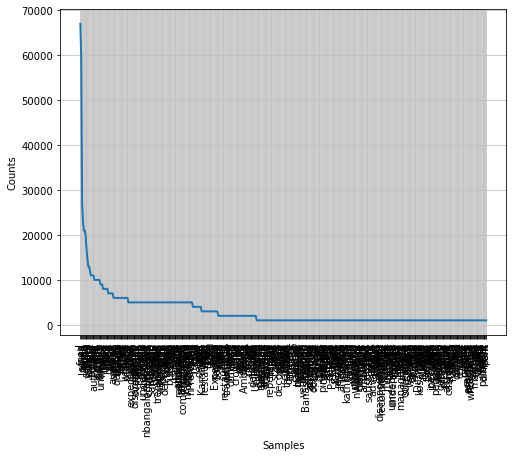

In [59]:
plt.figure(figsize=(8,6))
fd.plot()

In [60]:
from nltk import FreqDist, bigrams,trigrams

In [61]:
bi_grams = bigrams(total_reviews_1D)

In [62]:
bi_grams

<generator object bigrams at 0x7f95fe407200>

In [63]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram]=fd_bigrams[bigram]+1

In [64]:
fd_bigrams.most_common(20)

[(('south', 'Indian'), 23000),
 (('Indian', 'food'), 18000),
 (('waiting', 'staffs'), 10000),
 (('authentic', 'south'), 9000),
 (('food', 'served'), 7000),
 (('value', 'money'), 6000),
 (('food', 'quality'), 6000),
 (('quality', 'taste'), 6000),
 (('food', 'I'), 6000),
 (('Food', 'good'), 6000),
 (('Been', 'last'), 5000),
 (('last', 'week'), 5000),
 (('week', 'high'), 5000),
 (('high', 'expectations'), 5000),
 (('expectations', 'based'), 5000),
 (('based', 'reviews'), 5000),
 (('reviews', 'But'), 5000),
 (('But', 'utterly'), 5000),
 (('utterly', 'disappointed'), 5000),
 (('disappointed', 'food'), 5000)]

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

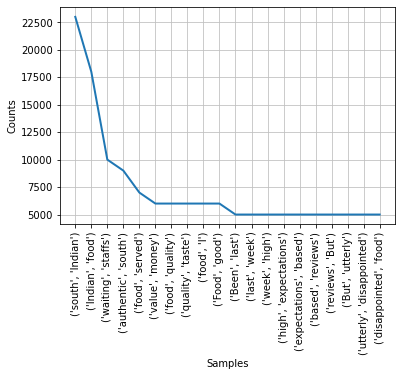

In [65]:
fd_bigrams.plot(20)

In [66]:
tri_gram = trigrams(total_reviews_1D)


In [67]:
fd_trigrams = FreqDist()

for trigram in tri_gram:
    fd_trigrams[trigram]=fd_trigrams[trigram]+1

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

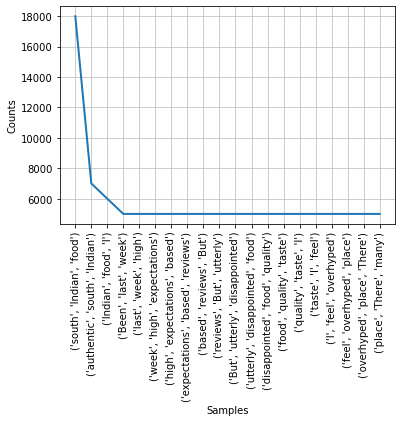

In [68]:
fd_trigrams.plot(20)

In [69]:
fd_trigrams

FreqDist({('south', 'Indian', 'food'): 18000, ('authentic', 'south', 'Indian'): 7000, ('Indian', 'food', 'I'): 6000, ('Been', 'last', 'week'): 5000, ('last', 'week', 'high'): 5000, ('week', 'high', 'expectations'): 5000, ('high', 'expectations', 'based'): 5000, ('expectations', 'based', 'reviews'): 5000, ('based', 'reviews', 'But'): 5000, ('reviews', 'But', 'utterly'): 5000, ...})

In [70]:
fd_trigrams.most_common(20)

[(('south', 'Indian', 'food'), 18000),
 (('authentic', 'south', 'Indian'), 7000),
 (('Indian', 'food', 'I'), 6000),
 (('Been', 'last', 'week'), 5000),
 (('last', 'week', 'high'), 5000),
 (('week', 'high', 'expectations'), 5000),
 (('high', 'expectations', 'based'), 5000),
 (('expectations', 'based', 'reviews'), 5000),
 (('based', 'reviews', 'But'), 5000),
 (('reviews', 'But', 'utterly'), 5000),
 (('But', 'utterly', 'disappointed'), 5000),
 (('utterly', 'disappointed', 'food'), 5000),
 (('disappointed', 'food', 'quality'), 5000),
 (('food', 'quality', 'taste'), 5000),
 (('quality', 'taste', 'I'), 5000),
 (('taste', 'I', 'feel'), 5000),
 (('I', 'feel', 'overhyped'), 5000),
 (('feel', 'overhyped', 'place'), 5000),
 (('overhyped', 'place', 'There'), 5000),
 (('place', 'There', 'many'), 5000)]

In [72]:
len(df['location'].unique())

94

In [73]:
df['location'] = df['location'] + " , Banglore, Karnataka, India"

In [74]:
df['location'].unique()

array(['Banashankari , Banglore, Karnataka, India',
       'Basavanagudi , Banglore, Karnataka, India',
       'Mysore Road , Banglore, Karnataka, India',
       'Jayanagar , Banglore, Karnataka, India',
       'Kumaraswamy Layout , Banglore, Karnataka, India',
       'Rajarajeshwari Nagar , Banglore, Karnataka, India',
       'Vijay Nagar , Banglore, Karnataka, India',
       'Uttarahalli , Banglore, Karnataka, India',
       'JP Nagar , Banglore, Karnataka, India',
       'South Bangalore , Banglore, Karnataka, India',
       'City Market , Banglore, Karnataka, India',
       'Nagarbhavi , Banglore, Karnataka, India',
       'Bannerghatta Road , Banglore, Karnataka, India',
       'BTM , Banglore, Karnataka, India',
       'Kanakapura Road , Banglore, Karnataka, India',
       'Bommanahalli , Banglore, Karnataka, India', nan,
       'CV Raman Nagar , Banglore, Karnataka, India',
       'Electronic City , Banglore, Karnataka, India',
       'HSR , Banglore, Karnataka, India',
       '

In [75]:
df_copy = df.copy()

In [76]:
df_copy['location'].isnull().sum()

21

In [77]:
df_copy = df_copy.dropna(subset=['location'])

In [78]:
df_copy['location'].isnull().sum()

0

In [79]:
locations = pd.DataFrame(df_copy['location'].unique())

In [80]:
locations.columns = ['name']

In [81]:
locations

,name
0,"Banashankari , Banglore, Karnataka, India"
1,"Basavanagudi , Banglore, Karnataka, India"
2,"Mysore Road , Banglore, Karnataka, India"
3,"Jayanagar , Banglore, Karnataka, India"
4,"Kumaraswamy Layout , Banglore, Karnataka, India"
...,...
88,"West Bangalore , Banglore, Karnataka, India"
89,"Magadi Road , Banglore, Karnataka, India"
90,"Yelahanka , Banglore, Karnataka, India"
91,"Sahakara Nagar , Banglore, Karnataka, India"


In [83]:
from geopy.geocoders import Nominatim

In [84]:
geolocator = Nominatim(user_agent="app" , timeout=None)

In [85]:
geolocator

In [86]:
mylocations = pd.DataFrame({
    'name': [
        'Banashankari, Bangalore, Karnataka, India',
        'Basavanagudi, Bangalore, Karnataka, India',
        'Mysore Road, Bangalore, Karnataka, India',
        'Jayanagar, Bangalore, Karnataka, India',
        'Kumaraswamy Layout, Bangalore, Karnataka, India',
        'West Bangalore, Bangalore, Karnataka, India',
        'Magadi Road, Bangalore, Karnataka, India',
        'Yelahanka, Bangalore, Karnataka, India',
        'Sahakara Nagar, Bangalore, Karnataka, India',
        'Peenya, Bangalore, Karnataka, India'
    ]
})
mylocations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
5,"West Bangalore, Bangalore, Karnataka, India"
6,"Magadi Road, Bangalore, Karnataka, India"
7,"Yelahanka, Bangalore, Karnataka, India"
8,"Sahakara Nagar, Bangalore, Karnataka, India"
9,"Peenya, Bangalore, Karnataka, India"


In [87]:
mylocations = pd.DataFrame({
    'name': [
        'Cubbon Park, Bangalore, Karnataka, India',
        'Brigade Road, Bangalore, Karnataka, India',
        'MG Road, Bangalore, Karnataka, India',
        'Koramangala, Bangalore, Karnataka, India',
        'Indiranagar, Bangalore, Karnataka, India',
        'Whitefield, Bangalore, Karnataka, India',
        'Bangalore Palace, Bangalore, Karnataka, India',
        'Vidhana Soudha, Bangalore, Karnataka, India',
        'Lalbagh Botanical Garden, Bangalore, Karnataka, India',
        'Bannerghatta National Park, Bangalore, Karnataka, India'
    ]
})

# Initialize the geolocator
geolocator = Nominatim(user_agent="app" , timeout=None)

# Loop through each row in the DataFrame
for index, row in mylocations.iterrows():
    location_name = row['name']  # Access the value in the 'name' column
    geoLocation = geolocator.geocode(location_name)
    
    if geoLocation is None:
        print(f"{index}: {location_name}: Not found")
    else:
        print(f"{index}: {location_name}: Latitude = {geoLocation.latitude}, Longitude = {geoLocation.longitude}")

0: Cubbon Park, Bangalore, Karnataka, India: Latitude = 12.9808954, Longitude = 77.597562
1: Brigade Road, Bangalore, Karnataka, India: Latitude = 12.9663221, Longitude = 77.6068047
2: MG Road, Bangalore, Karnataka, India: Latitude = 12.9755264, Longitude = 77.6067902
3: Koramangala, Bangalore, Karnataka, India: Latitude = 12.9581638, Longitude = 77.641321
4: Indiranagar, Bangalore, Karnataka, India: Latitude = 12.9962979, Longitude = 77.5452778
5: Whitefield, Bangalore, Karnataka, India: Latitude = 12.9696365, Longitude = 77.7497448
6: Bangalore Palace, Bangalore, Karnataka, India: Latitude = 12.9985954, Longitude = 77.59200860232801
7: Vidhana Soudha, Bangalore, Karnataka, India: Latitude = 12.979745399999999, Longitude = 77.59061672797948
8: Lalbagh Botanical Garden, Bangalore, Karnataka, India: Latitude = 12.948849150000001, Longitude = 77.5868881603906
9: Bannerghatta National Park, Bangalore, Karnataka, India: Latitude = 12.53290595, Longitude = 77.54619068920488


In [88]:
geolocator = Nominatim(user_agent="app" , timeout=None)
lat = []
lon = []

for location in locations['name']:
    geoLocation = geolocator.geocode(location)
    if geoLocation is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(geoLocation.latitude)
        lon.append(geoLocation.longitude)

# Assigning the lists to new columns in the DataFrame
locations['latitude'] = lat
locations['longitude'] = lon
locations

,name,latitude,longitude
0,"Banashankari , Banglore, Karnataka, India",NaN,NaN
1,"Basavanagudi , Banglore, Karnataka, India",NaN,NaN
2,"Mysore Road , Banglore, Karnataka, India",NaN,NaN
3,"Jayanagar , Banglore, Karnataka, India",NaN,NaN
4,"Kumaraswamy Layout , Banglore, Karnataka, India",NaN,NaN
...,...,...,...
88,"West Bangalore , Banglore, Karnataka, India",NaN,NaN
89,"Magadi Road , Banglore, Karnataka, India",NaN,NaN
90,"Yelahanka , Banglore, Karnataka, India",NaN,NaN
91,"Sahakara Nagar , Banglore, Karnataka, India",NaN,NaN


In [89]:
lat=[]
lon=[]

for location in locations['name']:
    geoLocation = geolocator.geocode(location)
    if geoLocation is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(locaton.longitude)
        

In [90]:
locations['latitude'] = lat
locations['longitude'] = lon


In [91]:
locations

,name,latitude,longitude
0,"Banashankari , Banglore, Karnataka, India",NaN,NaN
1,"Basavanagudi , Banglore, Karnataka, India",NaN,NaN
2,"Mysore Road , Banglore, Karnataka, India",NaN,NaN
3,"Jayanagar , Banglore, Karnataka, India",NaN,NaN
4,"Kumaraswamy Layout , Banglore, Karnataka, India",NaN,NaN
...,...,...,...
88,"West Bangalore , Banglore, Karnataka, India",NaN,NaN
89,"Magadi Road , Banglore, Karnataka, India",NaN,NaN
90,"Yelahanka , Banglore, Karnataka, India",NaN,NaN
91,"Sahakara Nagar , Banglore, Karnataka, India",NaN,NaN


In [92]:
locations.isnull().sum()

name          0
latitude     93
longitude    93
dtype: int64

In [93]:
df['cuisines'].isnull().sum()

45

In [94]:
df = df.dropna(subset='cuisines')

In [95]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [96]:
north_india.shape

(21085, 18)

In [97]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Banglore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Banglore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [98]:
north_india_rest_count=north_india['location'].value_counts().reset_index().rename(columns={'index':'name', "location":"count"})

In [99]:
north_india_rest_count

,name,count
0,"BTM , Banglore, Karnataka, India",2469
1,"HSR , Banglore, Karnataka, India",1123
2,"Whitefield , Banglore, Karnataka, India",1059
3,"Marathahalli , Banglore, Karnataka, India",1038
4,"JP Nagar , Banglore, Karnataka, India",958
...,...,...
85,"Hebbal , Banglore, Karnataka, India",4
86,"Jakkur , Banglore, Karnataka, India",3
87,"Central Bangalore , Banglore, Karnataka, India",2
88,"West Bangalore , Banglore, Karnataka, India",1


In [100]:
heatmap_df = north_india_rest_count.merge(locations, on= 'name', how = 'left')

In [101]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Banglore, Karnataka, India",2469,NaN,NaN
1,"HSR , Banglore, Karnataka, India",1123,NaN,NaN
2,"Whitefield , Banglore, Karnataka, India",1059,NaN,NaN
3,"Marathahalli , Banglore, Karnataka, India",1038,NaN,NaN
4,"JP Nagar , Banglore, Karnataka, India",958,NaN,NaN
...,...,...,...,...
85,"Hebbal , Banglore, Karnataka, India",4,NaN,NaN
86,"Jakkur , Banglore, Karnataka, India",3,NaN,NaN
87,"Central Bangalore , Banglore, Karnataka, India",2,NaN,NaN
88,"West Bangalore , Banglore, Karnataka, India",1,NaN,NaN


In [102]:
import folium

In [103]:
basemap = folium.Map()

In [104]:
basemap

In [105]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [106]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)